<a href="https://colab.research.google.com/github/seanvw/Ann_Egs/blob/main/plot_alt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

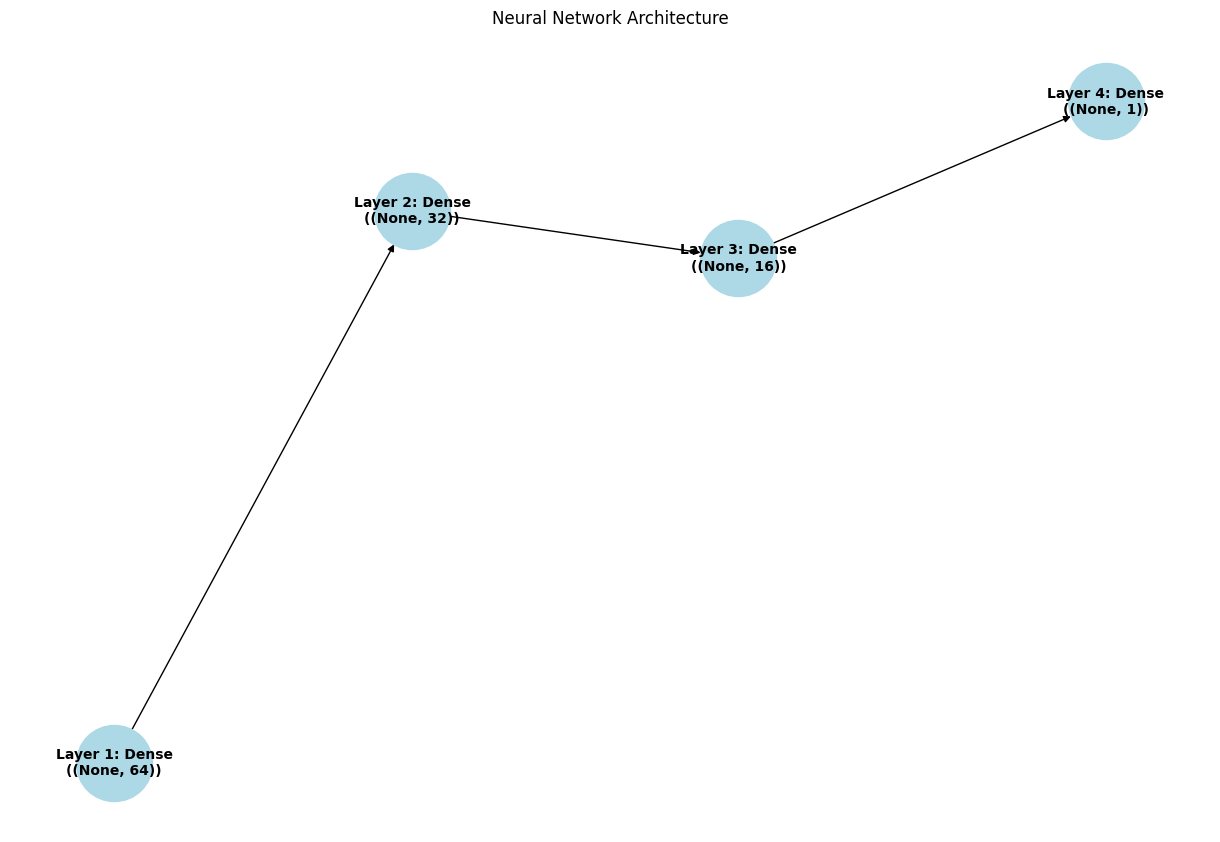

In [ ]:
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt

# Define a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Function to create a graph from the model
def create_graph(model):
    G = nx.DiGraph()
    for i, layer in enumerate(model.layers):
        layer_name = f"Layer {i+1}: {layer.__class__.__name__}\n({layer.output_shape})"
        G.add_node(layer_name, shape='box', style='filled', fillcolor='lightblue')
        if i > 0:
            previous_layer_name = f"Layer {i}: {model.layers[i-1].__class__.__name__}\n({model.layers[i-1].output_shape})"
            G.add_edge(previous_layer_name, layer_name)
    return G

# Create the graph
G = create_graph(model)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualizing
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
plt.title('Neural Network Architecture')
plt.show()